Makes a movie of the star's internal composition over time; for playing at APS

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.ticker import AutoMinorLocator
from scipy.interpolate import LinearNDInterpolator
import multiprocessing

In [2]:
[f.name for f in matplotlib.font_manager.fontManager.ttflist if f.name[:2] == "cm"]

['cmsy10',
 'cmss10',
 'cmmi10',
 'cmr10',
 'cmb10',
 'cmtt10',
 'cmex10',
 'cmsy10',
 'cmr10',
 'cmmi10',
 'cmex10']

In [3]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['font.family'] = 'cmr10'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["axes.formatter.use_mathtext"] = True
# plt.rcParams.update({
#     "lines.color": "white",
#     "patch.edgecolor": "white",
#     "text.color": "black",
#     "axes.facecolor": "white",
#     "axes.edgecolor": "lightgray",
#     "axes.labelcolor": "white",
#     "xtick.color": "white",
#     "ytick.color": "white",
#     "grid.color": "lightgray",
#     "figure.facecolor": "black",
#     "figure.edgecolor": "black",
#     "savefig.facecolor": "black",
#     "savefig.edgecolor": "black"
# })

In [4]:

isotopes = [
    'c12', 
    'o16', 
    'ne20', 
    'na23',
]


trace = [
    'na23',
]

color = {
    'c12': 'slateblue',
    'o16': 'orangered',
    'ne20': 'forestgreen',
    'na23': 'darkorange',
}


ls = {
    'c12': 'solid',
    'o16': 'dashed',
    'ne20': 'dotted',
    'na23': 'solid',
}


labels = {
    'c12': '$^{12}$C',
    'o16': '$^{16}$O',
    'ne20': '$^{20}$Ne',
    'na23': '$^{23}$Na',
}

In [5]:
m = 9
g = -10
key = f'm{m:04.1f}_g{g:+04.2f}_0'
index = pd.read_csv(f'csv/{key}/index.csv')
t = np.array(index["time to core O depletion (years)"])
N = np.array(index["surface num_a (/s)"])
slices = [ pd.read_csv(f'csv/{key}/slice_{int(i)}.csv') for i in index["slice"] ]

1500


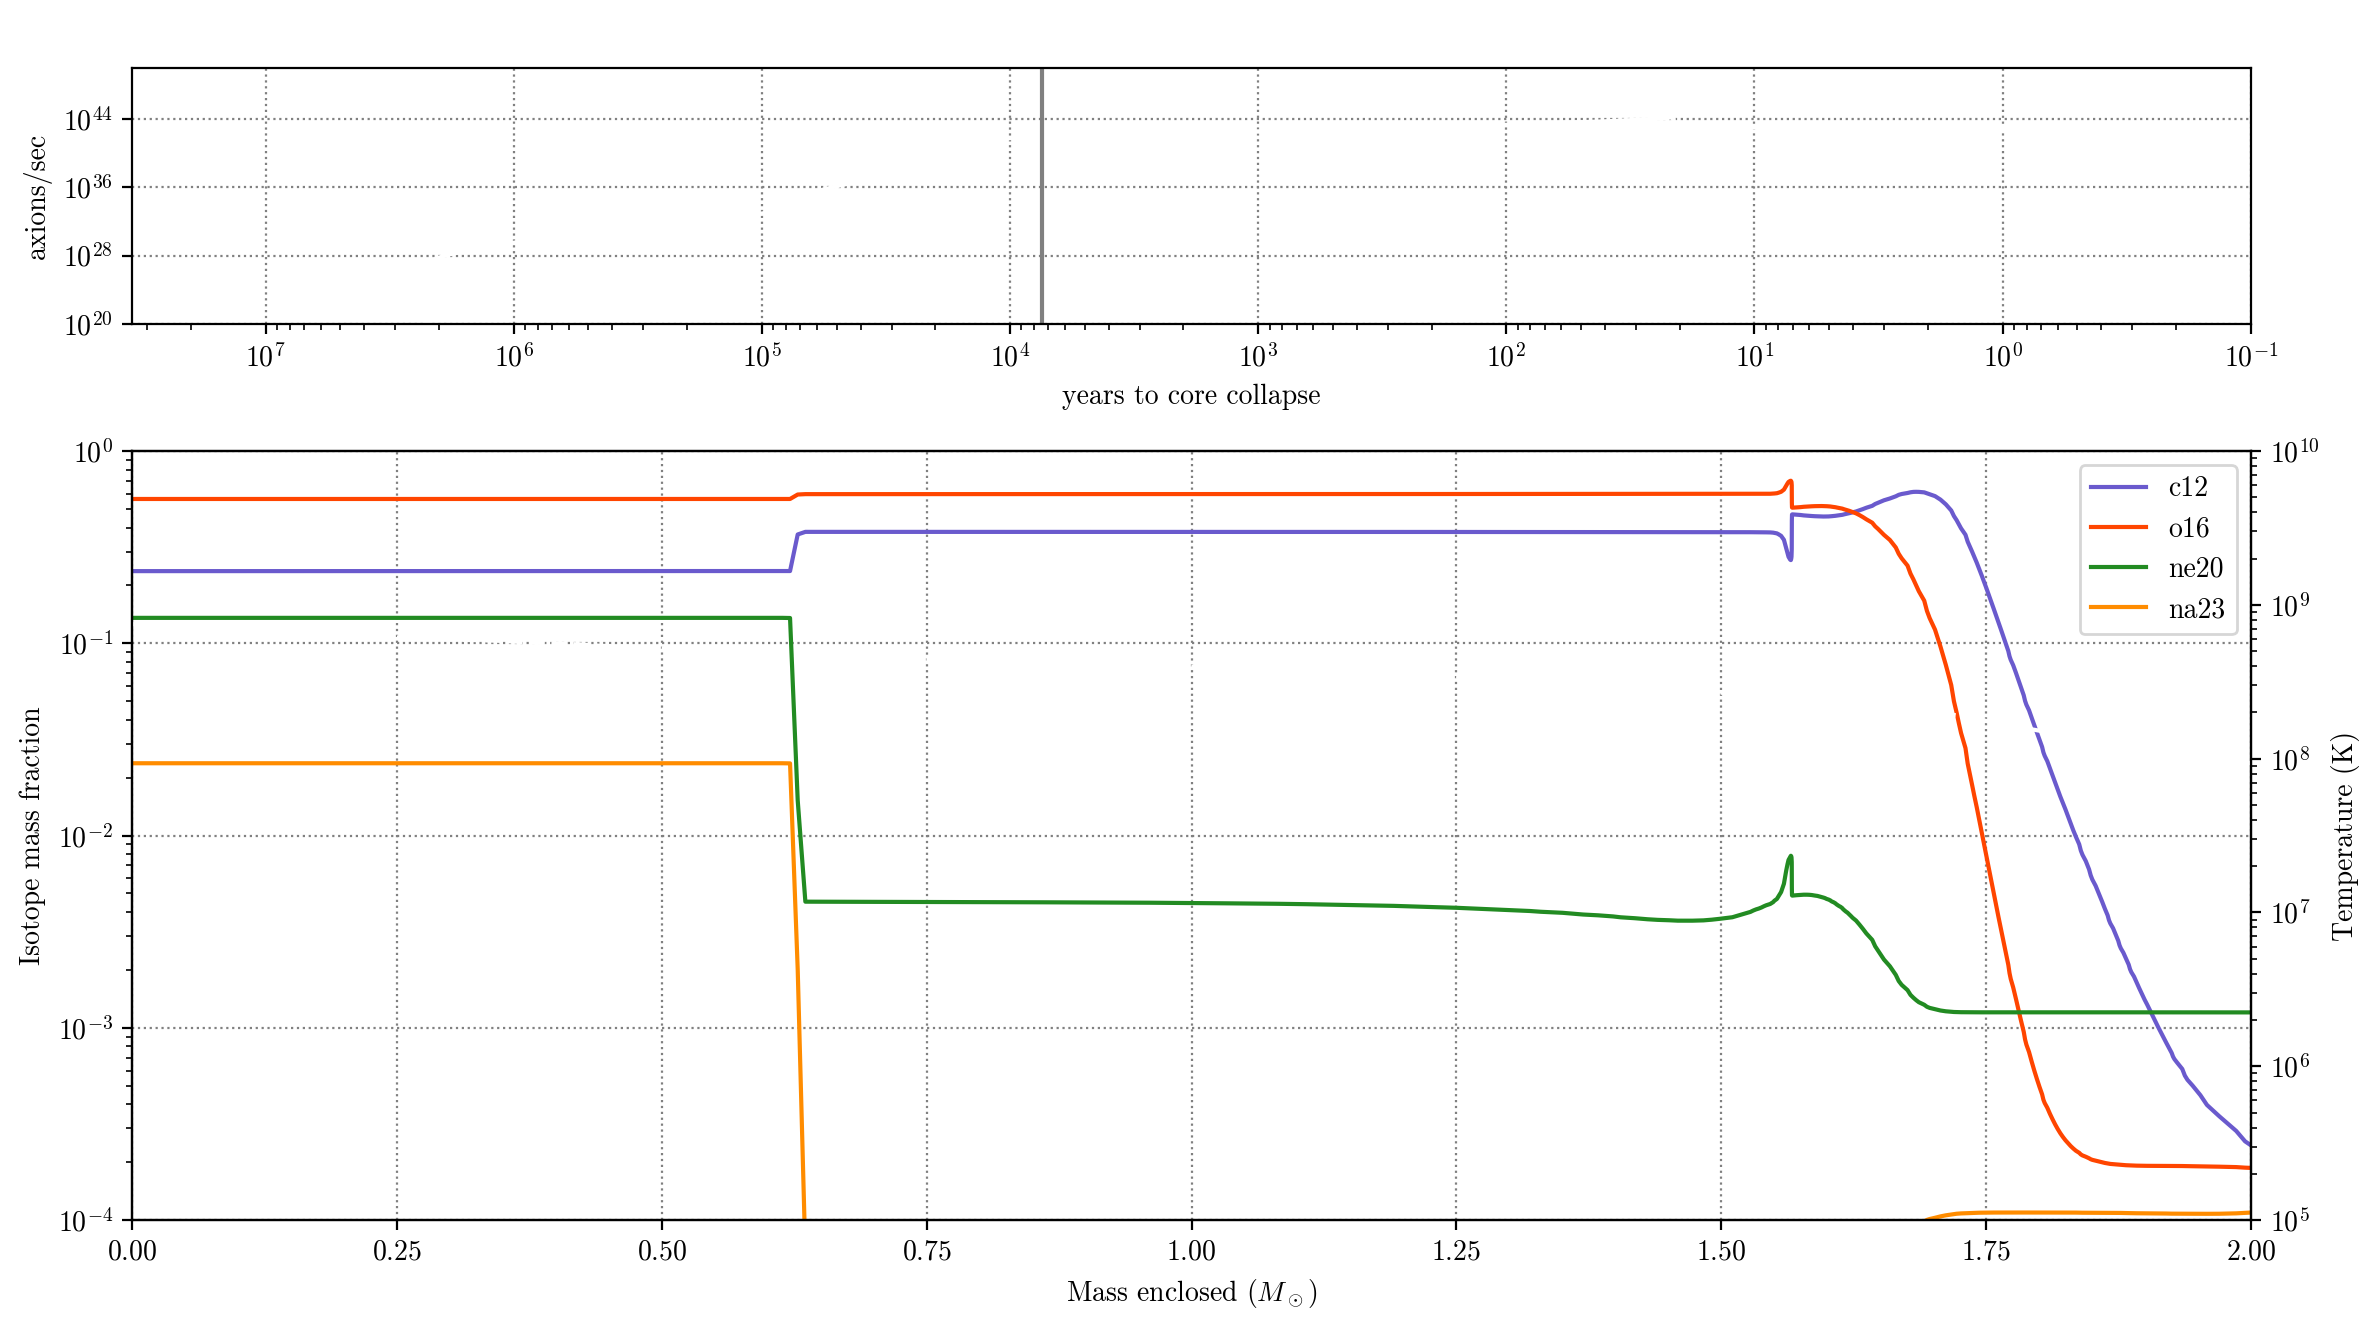

In [27]:

fig, (tax, Xax) = plt.subplots(nrows=2, figsize=(12, 9*0.75), gridspec_kw={'height_ratios': [1, 3]})
Tax = Xax.twinx()


iCstart = 1500
iCend = 10000
for (i, s) in enumerate(slices):
    if i not in range(iCstart, iCend):
        continue

    if i % 100 == 0:
        print(i)

    plt.sca(tax)
    tax.set_yscale('log')
    tax.set_xscale('log')
    plt.plot(t, N, c='white')
    plt.axvline(t[i], c='gray')
    plt.ylim(1e20, 1e50)
    plt.xlim(np.max(t), 1e-1)
    plt.title("Axion flux from a 9 $M_\odot$ star with $g_{eff} = 10^{-10}$", c="white")
    plt.xlabel("years to core collapse")
    plt.ylabel("axions/sec")
    plt.grid(c="gray", ls=":")
    
    plt.sca(Xax)
    Xax.set_yscale('log')

    m = np.array(s["mass enclosed (Msun)"])

    for iso in isotopes:
        plt.plot(m, np.array(s["X_"+iso]), label=iso, c=color[iso])

    plt.ylim(1e-4, 1)
    plt.xlim(0, 2)
    plt.xlabel("Mass enclosed ($M_\odot$)")
    plt.ylabel("Isotope mass fraction")
    plt.grid(c="gray", ls=":")
    plt.legend()

    plt.sca(Tax)
    Tax.set_yscale('log')
    plt.plot(m, np.array(s["T (K)"]), ls="--", c='white')
    plt.ylim(1e5, 1e10)
    plt.ylabel("Temperature (K)")
    plt.tight_layout()


    plt.savefig(f'slice3/{i:05}.png')
    plt.show()
    tax.clear()
    Xax.clear()
    Tax.clear()
    break